In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("C:\\Users\\HP-DK0272TX\\OneDrive\\Desktop\\file\\Codingrad\\train.csv")
test = pd.read_csv("C:\\Users\\HP-DK0272TX\\OneDrive\\Desktop\\file\\Codingrad\\test.csv")


In [3]:
train.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1


In [4]:
test.head(3)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199


In [5]:
train.shape, test.shape

((381109, 12), (127037, 11))

In [6]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [10]:
train.corr()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


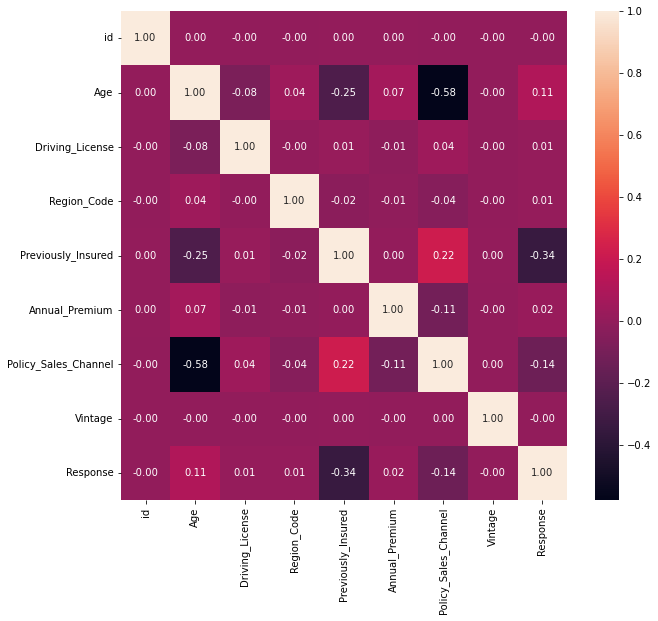

In [11]:
list1 = ["Age", "Annual_Premium", "Region_Code", "Vintage", "Response"]
plt.figure(figsize = (10,9))
sns.heatmap(train.corr(), annot = True, fmt = ".2f")
plt.show()

In [12]:
train.Driving_License.value_counts()

1    380297
0       812
Name: Driving_License, dtype: int64

<AxesSubplot:xlabel='Driving_License', ylabel='count'>

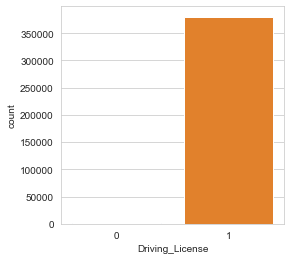

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (4,4))
sns.countplot(x ='Driving_License', data = train)

In [14]:
train.Previously_Insured.value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

<AxesSubplot:xlabel='Previously_Insured', ylabel='count'>

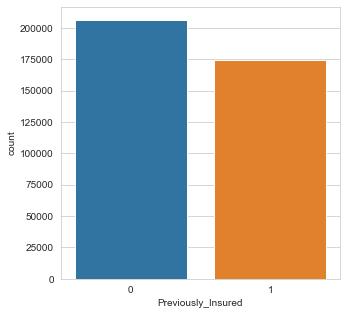

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='Previously_Insured', data = train)

In [16]:
train.Vehicle_Age.value_counts()

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

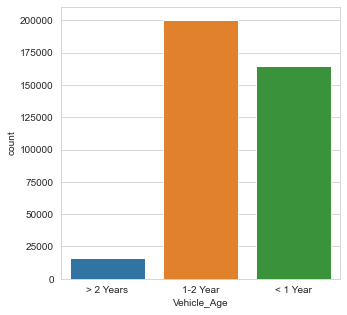

In [17]:
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='Vehicle_Age', data = train)

<AxesSubplot:xlabel='Age', ylabel='count'>

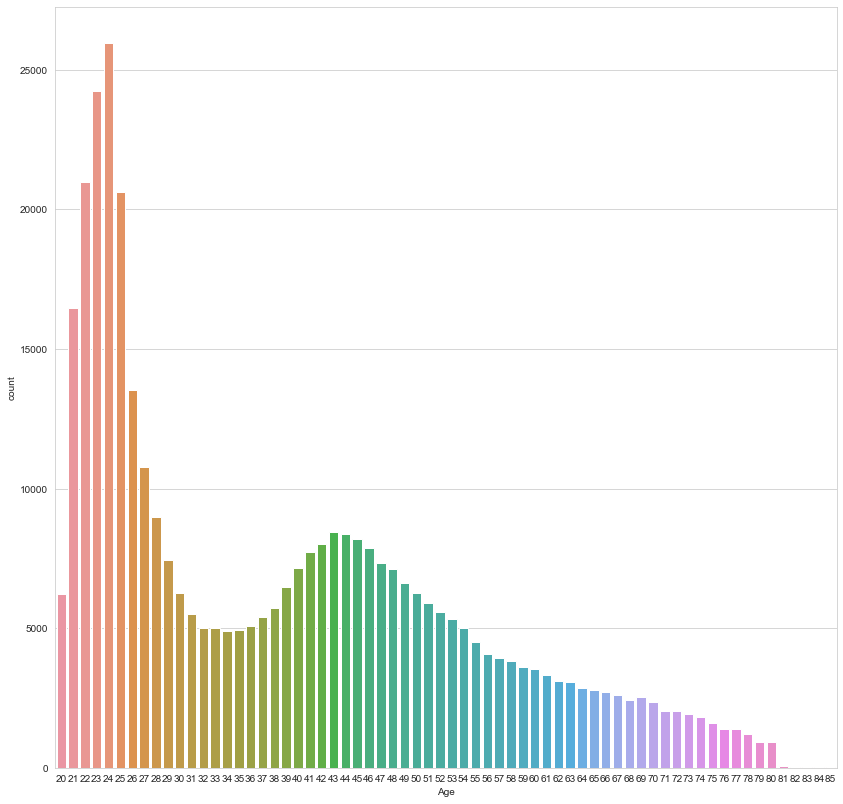

In [18]:
sns.set_style('whitegrid')
plt.figure(figsize = (14,14))
sns.countplot(x ='Age', data = train)

In [19]:
train.Vehicle_Damage.value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

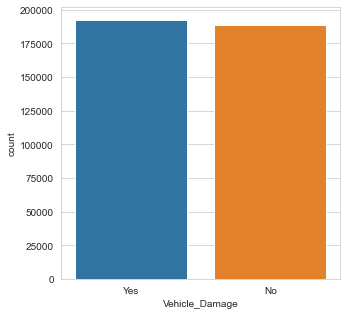

In [20]:
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='Vehicle_Damage', data = train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

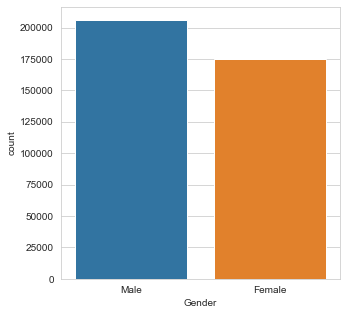

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (5,5))
sns.countplot(x ='Gender', data = train)

<AxesSubplot:ylabel='Annual_Premium'>

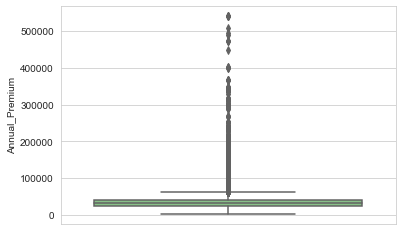

In [22]:
sns.boxplot(y = 'Annual_Premium', data = train,palette='Accent')


<AxesSubplot:xlabel='Vintage', ylabel='Density'>

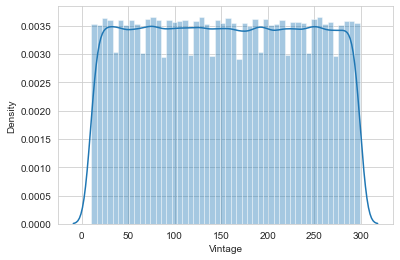

In [23]:
sns.distplot(train.Vintage)

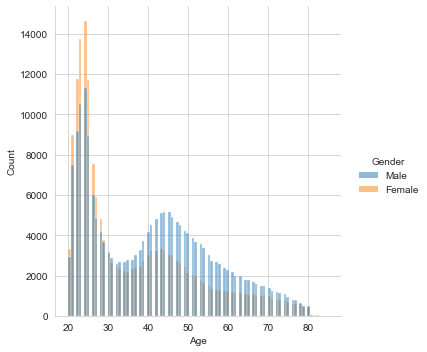

In [24]:
s=sns.displot(data=train, x="Age", hue="Gender")

<AxesSubplot:xlabel='Driving_License', ylabel='Response'>

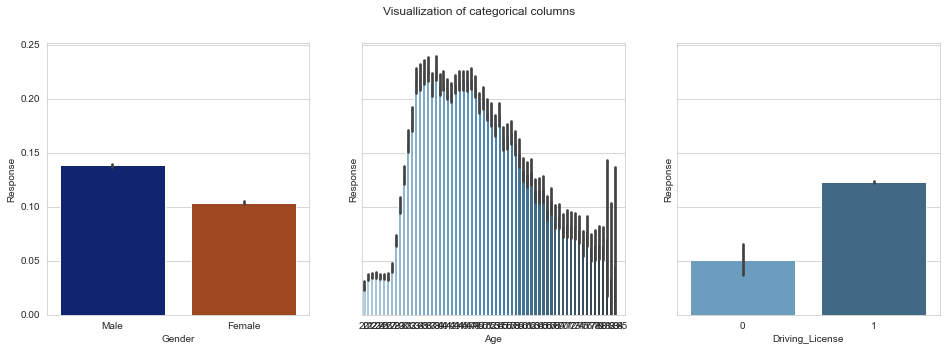

In [25]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
fig.suptitle('Visuallization of categorical columns')

# Fuel_Type
sns.barplot(x = 'Gender', y = 'Response', data = train, ax = axes[0],palette="dark")

# Seller_Type
sns.barplot(x = 'Age', y = 'Response', data = train, ax = axes[1],palette="Blues_d")

# Transmission
sns.barplot(x = 'Driving_License', y = 'Response', data = train, ax = axes[2],palette="Blues_d")


# Respose by gender

In [26]:
data_genderwise = train.groupby(['Gender','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data_genderwise

,Gender,Response,count
0,Female,0,156835
1,Female,1,18185
2,Male,0,177564
3,Male,1,28525


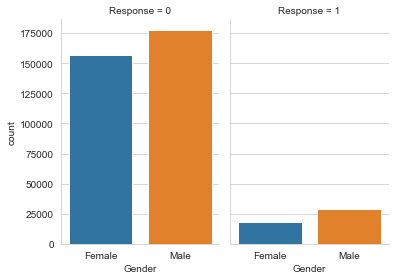

In [27]:
g = sns.catplot(x="Gender", y="count",col="Response",
                data=data_genderwise, kind="bar",
                height=4, aspect=.7);

# DrivingLicence By Gender

In [28]:
data_DrivingLicenceBy = train.groupby(['Gender'])['Driving_License'].count().to_frame().reset_index()
data_DrivingLicenceBy

,Gender,Driving_License
0,Female,175020
1,Male,206089


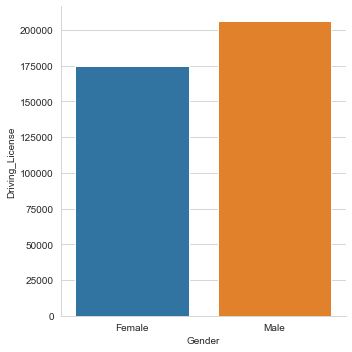

In [29]:
sns.catplot(x="Gender", y="Driving_License", data=data_DrivingLicenceBy, kind="bar")


In [30]:
data_DrivingLicence=train.groupby(['Driving_License','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data_DrivingLicence

,Driving_License,Response,count
0,0,0,771
1,0,1,41
2,1,0,333628
3,1,1,46669


# Response By Vehicle_Age

In [31]:
data_Vehicleage=train.groupby(['Vehicle_Age','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data_Vehicleage

,Vehicle_Age,Response,count
0,1-2 Year,0,165510
1,1-2 Year,1,34806
2,< 1 Year,0,157584
3,< 1 Year,1,7202
4,> 2 Years,0,11305
5,> 2 Years,1,4702


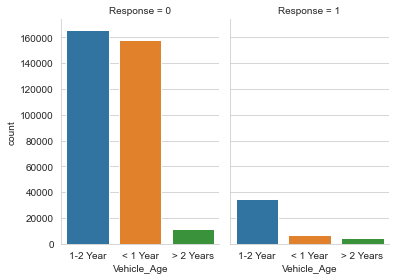

In [32]:
g2 = sns.catplot(x="Vehicle_Age", y="count",col="Response",
                data=data_Vehicleage, kind="bar",
                height=4, aspect=.7);

# Response By Damaged_Vehicle

In [33]:
data_Vehicle_Damage=train.groupby(['Vehicle_Damage','Response'])['id'].count().to_frame().rename(columns={'id':'count'}).reset_index()
data_Vehicle_Damage

,Vehicle_Damage,Response,count
0,No,0,187714
1,No,1,982
2,Yes,0,146685
3,Yes,1,45728


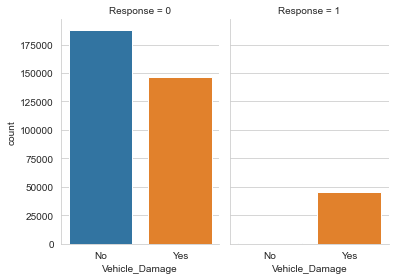

In [34]:
g3 = sns.catplot(x="Vehicle_Damage", y="count",col="Response",
                data=data_Vehicle_Damage, kind="bar",
                height=4, aspect=.7);

In [35]:
Gender=pd.get_dummies(train['Gender'],drop_first=True)
Gender

,Male
0,1
1,1
2,1
3,1
4,0
...,...
381104,1
381105,1
381106,1
381107,0


In [36]:
train.drop(labels=['Gender'],axis=1,inplace=True)

In [37]:
train.shape

(381109, 11)

In [38]:
train['Gender']=Gender

In [39]:
train.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [40]:
VAge=pd.get_dummies(train['Vehicle_Age'],)
VAge

,1-2 Year,< 1 Year,> 2 Years
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
381104,1,0,0
381105,0,1,0
381106,0,1,0
381107,0,0,1


In [41]:
VAge=VAge.rename(columns={"< 1 Year": "Veh_Age_lessthan_1_Yr", 
                          "> 2 Years": "Veh_Age_greaterthan_2_Yrs",
                          "1-2 Year": "Veh_Age_blw(1-2)_Yrs"})
VAge

,Veh_Age_blw(1-2)_Yrs,Veh_Age_lessthan_1_Yr,Veh_Age_greaterthan_2_Yrs
0,0,0,1
1,1,0,0
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
381104,1,0,0
381105,0,1,0
381106,0,1,0
381107,0,0,1


In [42]:
traindata=pd.concat([train,VAge],axis=1)

In [43]:
traindata.head()

,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Veh_Age_blw(1-2)_Yrs,Veh_Age_lessthan_1_Yr,Veh_Age_greaterthan_2_Yrs
0,1,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,1,0,0,1
1,2,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1,1,0,0
2,3,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,1,0,0,1
3,4,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1,0,1,0
4,5,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,0,0,1,0


In [44]:
traindata.drop(labels=['Vehicle_Age'],axis=1,inplace=True)


In [45]:
traindata['Vehicle_Damage'] = traindata['Vehicle_Damage'].map( {'Yes': 1, 'No': 0} ).astype(int)


In [46]:
traindata=traindata.rename(columns={"Vehicle_Damage": "Vehicle_Damage_Yes"})


In [47]:
traindata.shape

(381109, 14)

In [48]:
traindata.drop(labels=['id'],axis=1,inplace=True)

In [49]:
traindata.shape

(381109, 13)

In [50]:
traindata.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage_Yes,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Veh_Age_blw(1-2)_Yrs,Veh_Age_lessthan_1_Yr,Veh_Age_greaterthan_2_Yrs
0,44,1,28.0,0,1,40454.0,26.0,217,1,1,0,0,1
1,76,1,3.0,0,0,33536.0,26.0,183,0,1,1,0,0
2,47,1,28.0,0,1,38294.0,26.0,27,1,1,0,0,1
3,21,1,11.0,1,0,28619.0,152.0,203,0,1,0,1,0
4,29,1,41.0,1,0,27496.0,152.0,39,0,0,0,1,0


# Saving the cleaned train dataset to pickle file

In [51]:
import pickle
with open('EDA_Vehicledata.pkl', 'wb') as f:
    pickle.dump(traindata, f)

In [52]:
# Numerical and categorical columns
num_df= ['Age','Vintage']
cat_df = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
            'Vehicle_Age_gt_2_Years','Vehicle_Damage','Region_Code','Policy_Sales_Channel']


In [53]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer



cat_pipeline = Pipeline([
        # we will fill the NaNs with the mode
        ('imputer', SimpleImputer(strategy="most_frequent")),
        # the features has order meaning
        ('encoder', OrdinalEncoder()),
    ])
X=traindata.drop(['Response'], axis = 1)

# prepare the df form the ML models by calling the full_pipeline
X_prepared = cat_pipeline.fit_transform(X)
# inspect the number of rows & columns of the prepared df
X_prepared.shape

(381109, 12)

Now let's build a pipeline for preprocessing all the attributes:

In [54]:
traindata.columns

Index(['Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Damage_Yes', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender', 'Veh_Age_blw(1-2)_Yrs',
       'Veh_Age_lessthan_1_Yr', 'Veh_Age_greaterthan_2_Yrs'],
      dtype='object')

In [55]:
traindata

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage_Yes,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender,Veh_Age_blw(1-2)_Yrs,Veh_Age_lessthan_1_Yr,Veh_Age_greaterthan_2_Yrs
0,44,1,28.0,0,1,40454.0,26.0,217,1,1,0,0,1
1,76,1,3.0,0,0,33536.0,26.0,183,0,1,1,0,0
2,47,1,28.0,0,1,38294.0,26.0,27,1,1,0,0,1
3,21,1,11.0,1,0,28619.0,152.0,203,0,1,0,1,0
4,29,1,41.0,1,0,27496.0,152.0,39,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,0,30170.0,26.0,88,0,1,1,0,0
381105,30,1,37.0,1,0,40016.0,152.0,131,0,1,0,1,0
381106,21,1,30.0,1,0,35118.0,160.0,161,0,1,0,1,0
381107,68,1,14.0,0,1,44617.0,124.0,74,0,0,0,0,1


In [56]:
traindata.to_csv('traindata.csv', index=False)
